# IMT 573 - Lab 6 - Conditional Probability

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

Name: Steve Gonzales Collaborators: None

In this module, we have focused on statistical concepts. In this lab, you'll explore the concept of conditional probability using baseball data. Baseball is a bat-and-ball sport played in countries around the world including the United States, Canada, Cuba, the Dominican Republic, and Japan, to name a few. Baseball is a played between two teams who take turns batting and fielding. The objective of the game is to score "runs" by getting on "bases" with either "hits" or "walks". A run is scored when a player advances around the bases and returns to home plate. You can learn more [here](https://en.wikipedia.org/wiki/Baseball).

We will use a dataset of baseball game statistics from 2010-2013. You can learn more about the dataset at www.retrosheet.org/.

### Problem 1: Win probability

If a baseball team scores X runs, what is the probability it will win the game? This is the question we will explore in this lab (adapted from Decision Science News, 2014). 

#### (a) Import data

To begin, load the data found in the `GL2010.TXT`, `GL2011.TXT`, `GL2012.TXT`, `GL2013.TXT` into a single dataframe. You can find column names for the data in the `cnames.txt` file. You should ultimately have 9,720 rows of data.

In [1]:
import pandas as pd
import seaborn as sns

In [4]:
columns = pd.read_csv('cnames.txt')['Name'].tolist()
df = pd.read_csv('GL2010.TXT', header=None)
n = 0
for i, f in enumerate(['GL2011.TXT', 'GL2012.TXT', 'GL2013.TXT']):
    data = pd.read_csv(f, header=None)
    n += len(data)
    print(n, len(data))
    df = pd.concat([df, data])
df.columns = columns

print(len(df))
if len(df) != 9720:
    print("The data does not add up to 9720 rows")
display(df)

2429 2429
4859 2430
7290 2431
9720


,Date,Numberofgame,Day,Visitor,VisitorLeague,VisitorGameNum,Home,HomeLeague,HomeGameNum,VisitorScore,...,152,153,154,155,156,157,158,159,160,161
0,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,...,J.D. Drew,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y
1,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,...,Howie Kendrick,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y
2,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,...,A.J. Pierzynski,2,teahm001,Mark Teahen,5,ramia003,Alexei Ramirez,6,NaN,Y
3,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,...,Yuniesky Betancourt,6,kendj001,Jason Kendall,2,getzc001,Chris Getz,4,NaN,Y
4,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,...,Mark Ellis,4,buckt001,Travis Buck,7,pennc001,Cliff Pennington,6,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,20130929,0,Sun,DET,AL,162,MIA,NL,162,0,...,Chris Coghlan,5,hillk002,Koyie Hill,2,alvah001,Henderson Alvarez,1,NaN,Y
2427,20130929,0,Sun,MIL,NL,162,NYN,NL,162,2,...,Juan Centeno,2,tovaw001,Wilfredo Tovar,6,niesj001,Jonathon Niese,1,NaN,Y
2428,20130929,0,Sun,SDN,NL,162,SFN,NL,162,6,...,Brandon Crawford,6,perej002,Juan Perez,7,moscg001,Guillermo Moscoso,1,NaN,Y
2429,20130929,0,Sun,CHN,NL,162,SLN,NL,162,0,...,Shane Robinson,7,wongk001,Kolten Wong,4,westj001,Jake Westbrook,1,NaN,Y


In [5]:
df.dropna(subset=[df.columns[0]])

,Date,Numberofgame,Day,Visitor,VisitorLeague,VisitorGameNum,Home,HomeLeague,HomeGameNum,VisitorScore,...,152,153,154,155,156,157,158,159,160,161
0,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,...,J.D. Drew,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y
1,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,...,Howie Kendrick,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y
2,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,...,A.J. Pierzynski,2,teahm001,Mark Teahen,5,ramia003,Alexei Ramirez,6,NaN,Y
3,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,...,Yuniesky Betancourt,6,kendj001,Jason Kendall,2,getzc001,Chris Getz,4,NaN,Y
4,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,...,Mark Ellis,4,buckt001,Travis Buck,7,pennc001,Cliff Pennington,6,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,20130929,0,Sun,DET,AL,162,MIA,NL,162,0,...,Chris Coghlan,5,hillk002,Koyie Hill,2,alvah001,Henderson Alvarez,1,NaN,Y
2427,20130929,0,Sun,MIL,NL,162,NYN,NL,162,2,...,Juan Centeno,2,tovaw001,Wilfredo Tovar,6,niesj001,Jonathon Niese,1,NaN,Y
2428,20130929,0,Sun,SDN,NL,162,SFN,NL,162,6,...,Brandon Crawford,6,perej002,Juan Perez,7,moscg001,Guillermo Moscoso,1,NaN,Y
2429,20130929,0,Sun,CHN,NL,162,SLN,NL,162,0,...,Shane Robinson,7,wongk001,Kolten Wong,4,westj001,Jake Westbrook,1,NaN,Y


#### (b) Calculate conditional probability

Considering only games between two teams in the National League (NL), compute the conditional probability of the team winning given X runs scored, for X = 0 to 10. Do this separately for Home and Visitor teams.

In [6]:
# Are there any ties?
display(df.query("HomeScore == VisitorScore"))
print("No ties")

,Date,Numberofgame,Day,Visitor,VisitorLeague,VisitorGameNum,Home,HomeLeague,HomeGameNum,VisitorScore,...,152,153,154,155,156,157,158,159,160,161


No ties


In [7]:
def determine_outcome(row):
    if row['HomeScore'] > row['VisitorScore']:
        return 1, 0
    elif row['HomeScore'] < row['VisitorScore']:
        return 0, 1
    else:
        return 0, 0

# Apply the function to each row
df[['homeoutcome', 'visitoroutcome']] = df.apply(determine_outcome, axis=1, result_type='expand')

df_nl = df.query("VisitorLeague == 'NL' and HomeLeague == 'NL'")
print(columns)
df_nl = df_nl[['Visitor', 'Home','VisitorScore', 'HomeScore','homeoutcome', 'visitoroutcome']]
display(df_nl)

['Date', 'Numberofgame', 'Day', 'Visitor', 'VisitorLeague', 'VisitorGameNum', 'Home', 'HomeLeague', 'HomeGameNum', 'VisitorScore', 'HomeScore', 'Outs', 'DayorNight', 'Completion', 'Forfeit', 'Protest', 'ParkID', 'Attendance', 'DurationMinutes', 'VisitingLineScores', 'HomeLineScores', 'Vat-bats', 'Vhits', 'Vdoubles', 'Vtriples', 'Vhomeruns', 'VRBI', 'Vsacrificehits', 'Vsacrificeflies', 'Vhit-by-pitch', 'Vwalks', 'Vintentionalwalks', 'Vstrikeouts', 'Vstolenbases', 'Vcaughtstealing', 'Vgroundedintodoubleplays', 'Vawardedfirstoncatcherinterference', 'Vleftonbase', 'Vpitchersused', 'Vindividualearnedruns', 'Vteam arnedruns', 'Vwildpitches', 'Vbalks', 'Vputouts', 'Vassists', 'Verrors', 'Vpassed balls', 'Vdouble plays', 'Vtriple plays', 'Hat-bats', 'Hhits', 'Hdoubles', 'Htriples', 'Hhomeruns', 'HRBI', 'Hsacrificehits', 'Hsacrificeflies', 'Hhit-by-pitch', 'Hwalks', 'Hintentionalwalks', 'Hstrikeouts', 'Hstolenbases', 'Hcaughtstealing', 'Hgroundedintodoubleplays', 'Hawardedfirstoncatcherinterfer

,Visitor,Home,VisitorScore,HomeScore,homeoutcome,visitoroutcome
6,SDN,ARI,3,6,1,0
7,CHN,ATL,5,16,1,0
8,SLN,CIN,11,6,0,1
9,SFN,HOU,5,2,0,1
10,COL,MIL,5,3,0,1
...,...,...,...,...,...,...
2424,PIT,CIN,4,2,0,1
2425,COL,LAN,2,1,0,1
2427,MIL,NYN,2,3,1,0
2428,SDN,SFN,6,7,1,0


In [8]:
# Define a function to apply to the df
def calc_conditional_prob(df, score_col, win_col):
    probabilities = {}
    # Fill a dictionary of probabilities, one for each number of runs 0-10
    for x in range(11):
        # Filter out the total games with this score and get the #
        total_games = df[df[score_col] == x].shape[0]
        # Its a win if the score is x and the team won, count the games
        wins = df[(df[score_col] == x) & (df[win_col] == 1)].shape[0]
        # Calculate the probability
        prob = wins / total_games if total_games > 0 else 0
        probabilities[x] = prob
    return probabilities

# Calculate conditional probabilities for Home and Visitor teams
home_prob = calc_conditional_prob(df, 'HomeScore', 'homeoutcome')
visit_prob = calc_conditional_prob(df, 'VisitorScore', 'visitoroutcome')

print("Home team conditional probabilities of winning:", [f'runs:{r} prob={home_prob[r]:.2%}' for r in home_prob.keys()])
print('')
print("Visitor team conditional probabilities of winning:", [f'runs:{r} prob={visit_prob[r]:.2%}' for r in visit_prob.keys()])

Home team conditional probabilities of winning: ['runs:0 prob=0.00%', 'runs:1 prob=13.08%', 'runs:2 prob=29.02%', 'runs:3 prob=45.04%', 'runs:4 prob=60.12%', 'runs:5 prob=68.29%', 'runs:6 prob=76.45%', 'runs:7 prob=84.47%', 'runs:8 prob=86.23%', 'runs:9 prob=90.43%', 'runs:10 prob=94.69%']

Visitor team conditional probabilities of winning: ['runs:0 prob=0.00%', 'runs:1 prob=6.75%', 'runs:2 prob=20.75%', 'runs:3 prob=34.06%', 'runs:4 prob=50.65%', 'runs:5 prob=61.58%', 'runs:6 prob=73.87%', 'runs:7 prob=80.82%', 'runs:8 prob=87.15%', 'runs:9 prob=90.03%', 'runs:10 prob=94.44%']


### Problem 2: Visualization

Produce a visualization of the probability of winning, for each team, as a function of runs. What does it show?

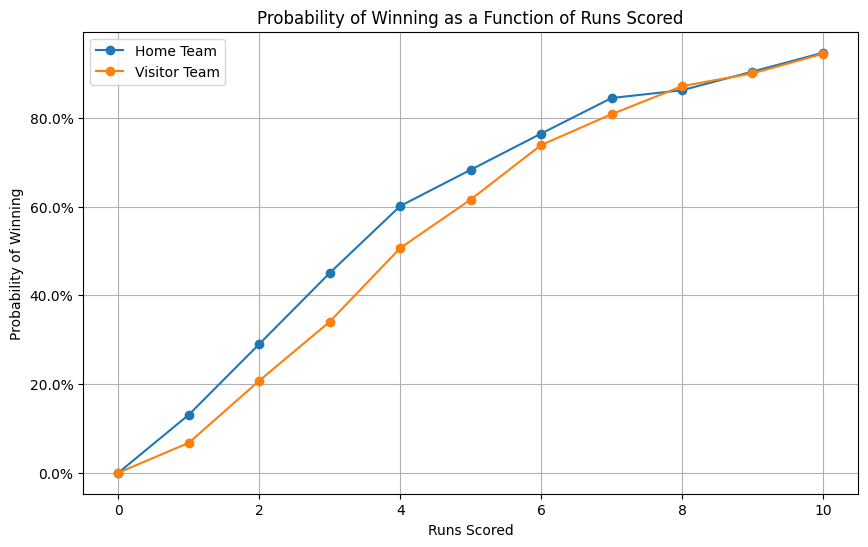

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.plot(list(home_prob.keys()), list(home_prob.values()), label='Home Team', marker='o')
plt.plot(list(visit_prob.keys()), list(visit_prob.values()), label='Visitor Team', marker='o')
plt.xlabel('Runs Scored')
plt.ylabel('Probability of Winning')
plt.title('Probability of Winning as a Function of Runs Scored')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1%}'))
plt.legend()
plt.grid(True)
plt.show()

This shows that home teams definitely have a higher probability of winning given the same number of runs to a point. Once it gets to 8 or greater, the probability of winning is the same